# Chapter 4. 시각화 도구
**그래프 사용 이유**
* 구조와 패턴 파악 용이
* 다양한 관점에서 데이터 관찰을 통한 통찰력 제공

## 1. Matplotlib - 기본 그래프 도구
* 파이썬 표준 시각화 도구라고 부를 정도로 다양한 포맷과 기능 지원
* 그래프 커스터마이징 가능
* 쉬운 사용법

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
# Excel 데이터를 데이터프레임 변환 
# 파일 : '시도별 전출입 인구수.xlsx'
# fillna=0, header=0
df = pd.read_excel('시도별 전출입 인구수.xlsx', fillna=0, header=0)
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [38]:
# 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
# 앞 데이터로 채우는 옵션 : ffill (forward fill)
df = df.ffill()
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [39]:
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') # 데이터 필터링 뒤에서 자세히 배움
df_seoul = df[mask]
df_seoul.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,서울특별시,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
21,서울특별시,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,서울특별시,대구광역시,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,서울특별시,인천광역시,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,서울특별시,광주광역시,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932


In [40]:
# '전출지별' 열 값이 모두 '서울특별시'로 동일하므로 '전출지별' 열 삭제
df_seoul.drop(['전출지별'], axis=1, inplace=True)
#'전입지별' -> '전입지' 수정
df_seoul.rename(columns={'전입지별':'전입지'}, inplace=True)

/Users/yehoon/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/yehoon/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [41]:
# '전입지'로 인덱스 설정
# set_index
df_seoul.set_index('전입지', inplace=True)
df_seoul

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
대전광역시,-,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
울산광역시,-,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,278411,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433


### 1-1. 선 그래프

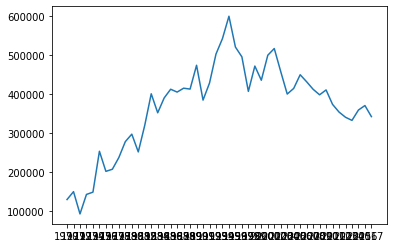

In [48]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택 해서 sr_one에 할당
sr_one = df_seoul.loc['경기도']

# x, y축 데이터를 plot 함수에 입력
# x: sr_one 의 인덱스 / y: sr_one 의 값
plt.plot(sr_one.index, sr_one.values)
plt.show()

#### 차트 제목, 축 이름 추가
~~~python
plt.title(제목)
plt.xlabel(x축 이름)
plt.ylabel(y축 이름)
~~~

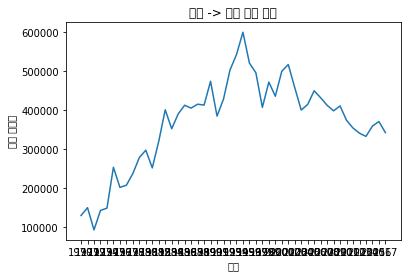

In [50]:
# 차트 제목 추가
# title: '서울 -> 경기 인구 이동'
plt.plot(sr_one.index, sr_one.values)
plt.title('서울 -> 경기 인구 이동')

# 축이름 추가
# xlabel: '기간'
# ylabel: '이동 인구수'
plt.xlabel('기간')
plt.ylabel('이동 인구수')
# 변경사항 저장하고 그래프 출력
plt.show()  

#### Matplotlib 한글 폰트 오류 해결

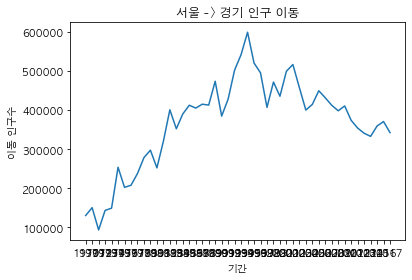

In [53]:
# matplotlib 한글 폰트 오류 문제 해결
# from matplotlib import font_manager, rc
# font_path = "./malgun.ttf"   #폰트파일의 위치
# font_name = font_manager.FontProperties(fname=font_path).get_name()
# rc('font', family=font_name)

plt.rcParams["font.family"] = 'AppleGothic'


# x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

# 차트 제목 추가
plt.title('서울 -> 경기 인구 이동')

# 축이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.show()  # 변경사항 저장하고 그래프 출력

#### 그래프 꾸미기

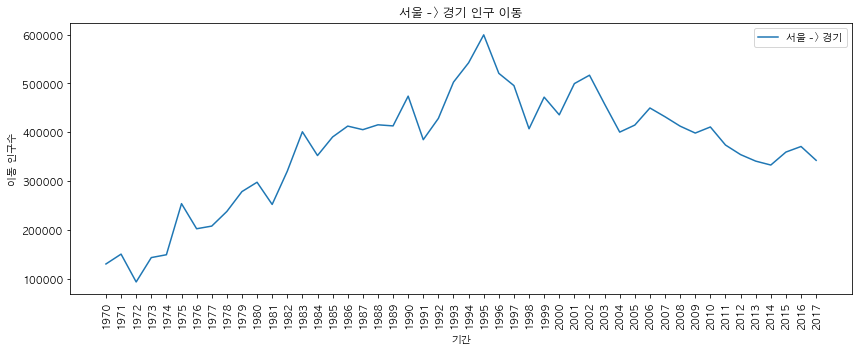

In [57]:
# 그림 사이즈 지정(가로 14인치, 세로 5인치)
# figure 함수의 figsize 옵션을 (14, 5)로 설정
plt.figure(figsize=(14, 5))

# x축 눈금 라벨 회전하기
# xticks 함수의 rotation 옵션을 'vertical'설정
plt.xticks(rotation='vertical')

# x, y축 데이터를 plot 함수에 입력 
plt.plot(sr_one.index, sr_one.values)

plt.title('서울 -> 경기 인구 이동')  #차트 제목
plt.xlabel('기간')                  #x축 이름
plt.ylabel('이동 인구수')           #y축 이름

# 범례 설정
# legend 함수의 labels 옵션을 ['서울 -> 경기'], loc 옵션을 'best'로 설정
plt.legend(labels=['서울 -> 경기'], loc='best')
plt.show()  # 변경사항 저장하고 그래프 출력

#### #스타일 지정

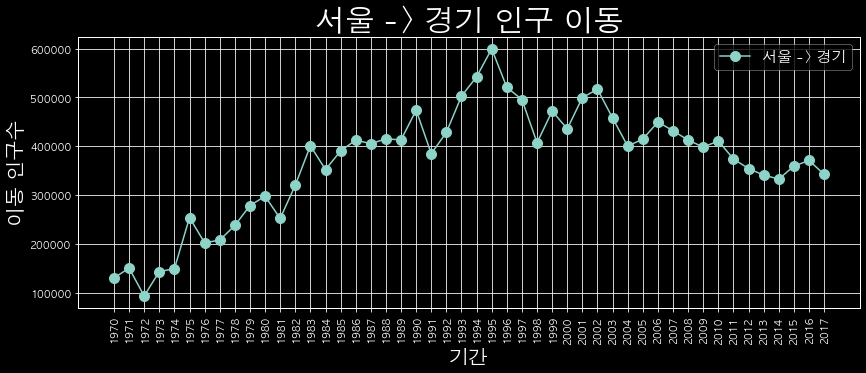

In [60]:
# 스타일 서식 지정
plt.style.use('dark_background') 

# 그림 사이즈 지정 (14, 5)
plt.figure(figsize=(14,5))

# x축 눈금 라벨 회전하고 사이즈 10으로 설정
plt.xticks(rotation='vertical', size=10)

# x, y축 데이터를 plot 함수에 입력 
# marker 옵션 'o' 로 설정
# markersize 10 으로 설정
plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10)


plt.title('서울 -> 경기 인구 이동', size=30)  #차트 제목
plt.xlabel('기간', size=20)                  #x축 이름
plt.ylabel('이동 인구수', size=20)           #y축 이름

plt.legend(labels=['서울 -> 경기'], loc='best', fontsize=15)   #범례 표시

plt.show()  # 변경사항 저장하고 그래프 출력

In [59]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


#### #그래프 주석 달기

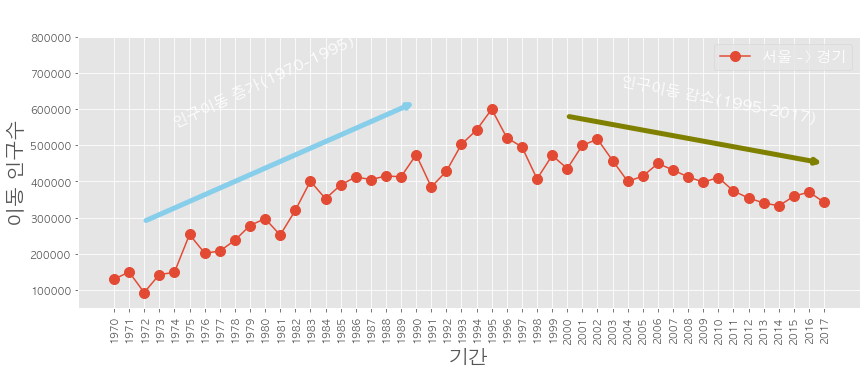

In [61]:
plt.style.use('ggplot') 
plt.figure(figsize=(14, 5))
plt.xticks(size=10, rotation='vertical')
plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10)  # 마커 표시 추가
plt.title('서울 -> 경기 인구 이동', size=30)
plt.xlabel('기간', size=20)
plt.ylabel('이동 인구수', size=20)
plt.legend(labels=['서울 -> 경기'], loc='best', fontsize=15)

# y축 범위 지정 (최소값, 최대값)
plt.ylim(50000, 800000)

# 주석 표시 - 화살표
plt.annotate('',
             xy=(20, 620000),       #화살표의 머리 부분(끝점)
             xytext=(2, 290000),    #화살표의 꼬리 부분(시작점)
             xycoords='data',       #좌표체계
             arrowprops=dict(arrowstyle='->', color='skyblue', lw=5), #화살표 서식
             )

plt.annotate('',
             xy=(47, 450000),       #화살표의 머리 부분(끝점)
             xytext=(30, 580000),   #화살표의 꼬리 부분(시작점)
             xycoords='data',       #좌표체계
             arrowprops=dict(arrowstyle='->', color='olive', lw=5),  #화살표 서식
             )

# 주석 표시 - 텍스트
plt.annotate('인구이동 증가(1970-1995)',  #텍스트 입력
             xy=(10, 550000),            #텍스트 위치 기준점
             rotation=25,                #텍스트 회전각도
             va='baseline',              #텍스트 상하 정렬
             ha='center',                #텍스트 좌우 정렬
             fontsize=15,                #텍스트 크기
             )

plt.annotate('인구이동 감소(1995-2017)',  #텍스트 입력
             xy=(40, 560000),            #텍스트 위치 기준점
             rotation=-11,               #텍스트 회전각도
             va='baseline',              #텍스트 상하 정렬
             ha='center',                #텍스트 좌우 정렬
             fontsize=15,                #텍스트 크기
             )

plt.show()  # 변경사항 저장하고 그래프 출력


#### 화면 분할하여 그래프 여러 개 그리기 -  axe 객체 활용

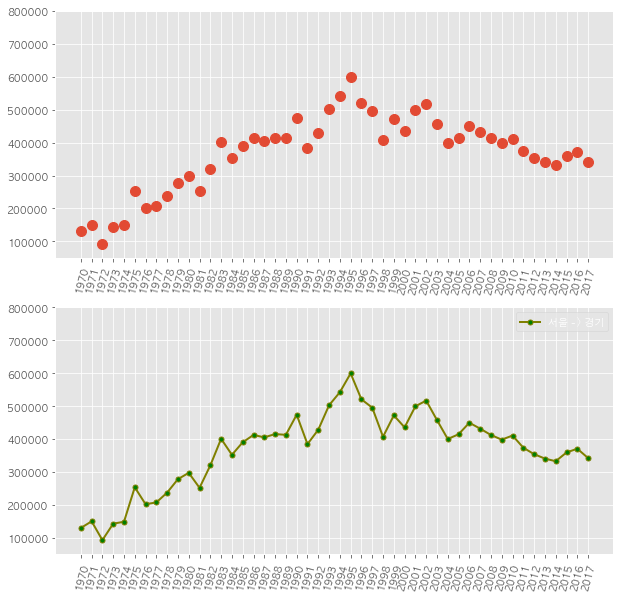

In [62]:
# 스타일 서식 지정
plt.style.use('ggplot') 

# 그래프 객체 생성 (figure에 2개의 서브 플롯을 생성)
fig = plt.figure(figsize=(10, 10))   
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

# axe 객체에 plot 함수로 그래프 출력
ax1.plot(sr_one, 'o', markersize=10)
ax2.plot(sr_one, marker='.', markerfacecolor='green', markersize=10, 
         color='olive', linewidth=2, label='서울 -> 경기')
ax2.legend(loc='best')

#y축 범위 지정 (최소값, 최대값)
ax1.set_ylim(50000, 800000)
ax2.set_ylim(50000, 800000)

# 축 눈금 라벨 지정 및 75도 회전
ax1.set_xticklabels(sr_one.index, rotation=75)
ax2.set_xticklabels(sr_one.index, rotation=75)

plt.show()  # 변경사항 저장하고 그래프 출력

#### axe 객체 그래프 꾸미기

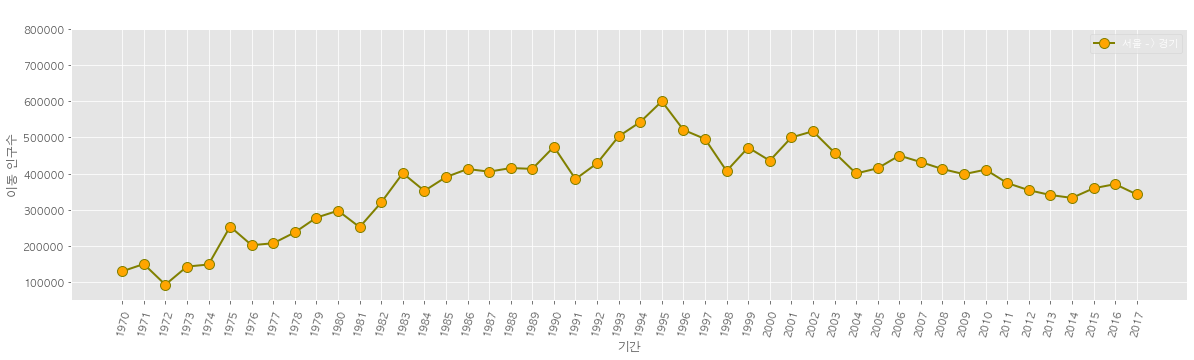

In [64]:
# 스타일 서식 지정
plt.style.use('ggplot') 

# 그래프 객체 생성 (figure에 1개의 서브 플롯을 생성)
fig = plt.figure(figsize=(20, 5))   
ax = fig.add_subplot(1, 1, 1)

# axe 객체에 plot 함수로 그래프 출력
ax.plot(sr_one, marker='o', markerfacecolor='orange', markersize=10, 
        color='olive', linewidth=2, label='서울 -> 경기')
ax.legend(loc='best')

#y축 범위 지정 (최소값, 최대값)
ax.set_ylim(50000, 800000)

# 차트 제목 추가
ax.set_title('서울 -> 경기 인구 이동', size=20)

# 축이름 추가
ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수', size = 12)

# 축 눈금 라벨 지정 및 75도 회전
ax.set_xticklabels(sr_one.index, rotation=75)

# 축 눈금 라벨 크기
ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)

plt.show()  # 변경사항 저장하고 그래프 출력

#### #하나의 Figure에 여러 그래프 추가

In [65]:
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 '충청남도','경상북도', '강원도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_3 = df_seoul.loc[['충청남도','경상북도', '강원도'], col_years]

df_3.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
충청남도,15954,18943,23406,27139,25509,51205,41447,43993,48091,45388,...,27458,24889,24522,24723,22269,21486,21473,22299,21741,21020
경상북도,11868,16459,22073,27531,26902,46177,40376,41155,42940,43565,...,15425,16569,16042,15818,15191,14420,14456,15113,14236,12464
강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,27599,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016


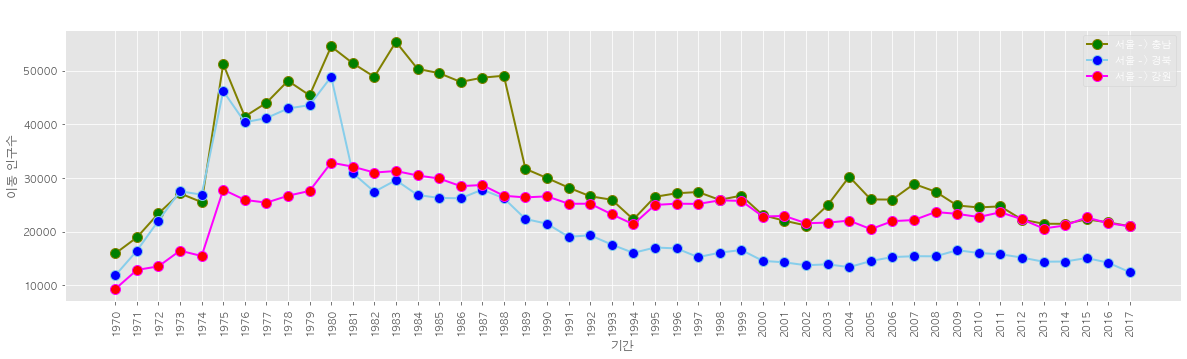

In [66]:
# 스타일 서식 지정
plt.style.use('ggplot') 

# 그래프 객체 생성 (figure에 1개의 서브 플롯을 생성)
fig = plt.figure(figsize=(20, 5))   
ax = fig.add_subplot(1, 1, 1)

# axe 객체에 plot 함수로 그래프 출력
ax.plot(col_years, df_3.loc['충청남도',:], marker='o', markerfacecolor='green', 
        markersize=10, color='olive', linewidth=2, label='서울 -> 충남')
ax.plot(col_years, df_3.loc['경상북도',:], marker='o', markerfacecolor='blue', 
        markersize=10, color='skyblue', linewidth=2, label='서울 -> 경북')
ax.plot(col_years, df_3.loc['강원도',:], marker='o', markerfacecolor='red', 
        markersize=10, color='magenta', linewidth=2, label='서울 -> 강원')

# 범례 표시
ax.legend(loc='best')

# 차트 제목 추가
ax.set_title('서울 -> 충남, 경북, 강원 인구 이동', size=20)

# 축이름 추가
ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수', size = 12)

# 축 눈금 라벨 지정 및 90도 회전
ax.set_xticklabels(col_years, rotation=90)

# 축 눈금 라벨 크기
ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)

plt.show()  # 변경사항 저장하고 그래프 출력

#### 각 그래프 다른 Figure에 그리기

In [67]:
# 서울에서 '충청남도','경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]
df_4.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
충청남도,15954,18943,23406,27139,25509,51205,41447,43993,48091,45388,...,27458,24889,24522,24723,22269,21486,21473,22299,21741,21020
경상북도,11868,16459,22073,27531,26902,46177,40376,41155,42940,43565,...,15425,16569,16042,15818,15191,14420,14456,15113,14236,12464
강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,27599,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016
전라남도,10513,16755,20157,22160,21314,46610,46251,43430,44624,47934,...,16601,17468,16429,15974,14765,14187,14591,14598,13065,12426


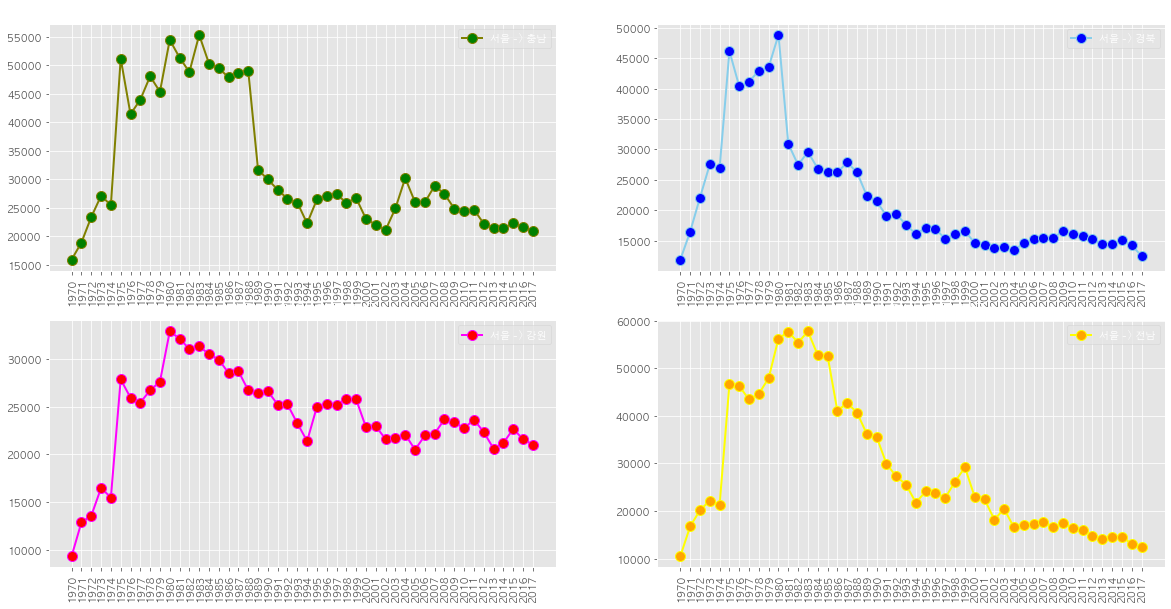

In [69]:
# 스타일 서식 지정
plt.style.use('ggplot') 

# 그래프 객체 생성 (figure에 1개의 서브 플롯을 생성)
fig = plt.figure(figsize=(20, 10))   
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# axe 객체에 plot 함수로 그래프 출력
ax1.plot(col_years, df_4.loc['충청남도',:], marker='o', markerfacecolor='green', 
        markersize=10, color='olive', linewidth=2, label='서울 -> 충남')
ax2.plot(col_years, df_4.loc['경상북도',:], marker='o', markerfacecolor='blue', 
        markersize=10, color='skyblue', linewidth=2, label='서울 -> 경북')
ax3.plot(col_years, df_4.loc['강원도',:], marker='o', markerfacecolor='red', 
        markersize=10, color='magenta', linewidth=2, label='서울 -> 강원')
ax4.plot(col_years, df_4.loc['전라남도',:], marker='o', markerfacecolor='orange', 
        markersize=10, color='yellow', linewidth=2, label='서울 -> 전남')

# 범례 표시
ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
ax4.legend(loc='best')

# 차트 제목 추가
ax1.set_title('서울 -> 충남 인구 이동', size=15)
ax2.set_title('서울 -> 경북 인구 이동', size=15)
ax3.set_title('서울 -> 강원 인구 이동', size=15)
ax4.set_title('서울 -> 전남 인구 이동', size=15)

# 축 눈금 라벨 지정 및 90도 회전
ax1.set_xticklabels(col_years, rotation=90)
ax2.set_xticklabels(col_years, rotation=90)
ax3.set_xticklabels(col_years, rotation=90)
ax4.set_xticklabels(col_years, rotation=90)

plt.show()  # 변경사항 저장하고 그래프 출력

In [70]:
# 사용할 수 있는 색 확인
import matplotlib

# 컬러 정보를 담을 빈 딕셔너리 생성
colors={}

# 컬러 이름과 헥사코드 확인하여 딕셔서리에 입력
for name, hex in matplotlib.colors.cnames.items():
    colors[name] = hex

# 딕셔너리 출력    
print(colors)

{'aliceblue': '#F0F8FF', 'antiquewhite': '#FAEBD7', 'aqua': '#00FFFF', 'aquamarine': '#7FFFD4', 'azure': '#F0FFFF', 'beige': '#F5F5DC', 'bisque': '#FFE4C4', 'black': '#000000', 'blanchedalmond': '#FFEBCD', 'blue': '#0000FF', 'blueviolet': '#8A2BE2', 'brown': '#A52A2A', 'burlywood': '#DEB887', 'cadetblue': '#5F9EA0', 'chartreuse': '#7FFF00', 'chocolate': '#D2691E', 'coral': '#FF7F50', 'cornflowerblue': '#6495ED', 'cornsilk': '#FFF8DC', 'crimson': '#DC143C', 'cyan': '#00FFFF', 'darkblue': '#00008B', 'darkcyan': '#008B8B', 'darkgoldenrod': '#B8860B', 'darkgray': '#A9A9A9', 'darkgreen': '#006400', 'darkgrey': '#A9A9A9', 'darkkhaki': '#BDB76B', 'darkmagenta': '#8B008B', 'darkolivegreen': '#556B2F', 'darkorange': '#FF8C00', 'darkorchid': '#9932CC', 'darkred': '#8B0000', 'darksalmon': '#E9967A', 'darkseagreen': '#8FBC8F', 'darkslateblue': '#483D8B', 'darkslategray': '#2F4F4F', 'darkslategrey': '#2F4F4F', 'darkturquoise': '#00CED1', 'darkviolet': '#9400D3', 'deeppink': '#FF1493', 'deepskyblue'